In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
import plotly.express as px
import tensorflow as tf
from tensorflow import keras

# Carlifonia housing prices estimator

In [5]:
df = pd.read_csv('datasets/housing.csv')
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100,INLAND
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,77100,INLAND
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300,INLAND
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700,INLAND


In [6]:
df['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [7]:
corr_matrix = df.corr()
corr_matrix

C:\Users\Nunoo Justice Samuel\AppData\Local\Temp\ipykernel_12620\2355143037.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


In [9]:
# plotting map with interest in location and price
fig = px.scatter_mapbox(
    df,
    lat = "latitude",
    lon=  "longitude",
    text = "ocean_proximity",
    width= 800,
    height=500,
    mapbox_style ="stamen-terrain",
    color= "median_house_value",
    size= "population",
    zoom=5
)
fig.show()

In [10]:
df1 = df.drop(['longitude', 'latitude'], axis='columns')
df1['median_house_value'] = df1.median_house_value.apply(lambda x: x/100000)
df1.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,41,880,129.0,322,126,8.3252,4.526,NEAR BAY
1,21,7099,1106.0,2401,1138,8.3014,3.585,NEAR BAY
2,52,1467,190.0,496,177,7.2574,3.521,NEAR BAY
3,52,1274,235.0,558,219,5.6431,3.413,NEAR BAY
4,52,1627,280.0,565,259,3.8462,3.422,NEAR BAY


In [11]:
d = [value for _, value in df1.groupby('ocean_proximity')]
d

[       housing_median_age  total_rooms  total_bedrooms  population  \
 701                    32         1283           194.0         485   
 830                     9         3666           711.0        2341   
 859                    21         4342           783.0        2172   
 860                    15         3575           597.0        1777   
 861                    20         4126          1031.0        2079   
 ...                   ...          ...             ...         ...   
 20502                  45          121            25.0          67   
 20503                  27          534            85.0         243   
 20504                  11         5451           736.0        2526   
 20505                  22         3266           529.0        1595   
 20506                   8         4983           754.0        2510   
 
        households  median_income  median_house_value ocean_proximity  
 701           171         6.0574               4.310       <1H OCEAN  
 8

In [12]:
df.groupby('median_house_value').ocean_proximity.count()

median_house_value
14999       4
17500       1
22500       4
25000       1
26600       1
         ... 
498800      1
499000      1
499100      1
500000     27
500001    965
Name: ocean_proximity, Length: 3842, dtype: int64

In [13]:
df1[df1.ocean_proximity == 'ISLAND']

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
8314,27,1675,521.0,744,331,2.1579,4.500,ISLAND
8315,52,2359,591.0,1100,431,2.8333,4.147,ISLAND
8316,52,2127,512.0,733,288,3.3906,3.000,ISLAND
8317,52,996,264.0,341,160,2.7361,4.500,ISLAND
8318,29,716,214.0,422,173,2.6042,2.875,ISLAND


In [14]:
df2 = df1.copy()
df2['bedrooms_per_total_rooms'] = df2['total_bedrooms'] / df2['total_rooms']
df2['households_per_population'] = df2['households'] / df2['population']
df3 = df2.drop(['total_bedrooms', 'total_rooms', 'households', 'population'], axis='columns')

In [15]:
df3.head()

,housing_median_age,median_income,median_house_value,ocean_proximity,bedrooms_per_total_rooms,households_per_population
0,41,8.3252,4.526,NEAR BAY,0.146591,0.391304
1,21,8.3014,3.585,NEAR BAY,0.155797,0.473969
2,52,7.2574,3.521,NEAR BAY,0.129516,0.356855
3,52,5.6431,3.413,NEAR BAY,0.184458,0.392473
4,52,3.8462,3.422,NEAR BAY,0.172096,0.458407


In [16]:
dummies = pd.get_dummies(df1.ocean_proximity)

In [17]:
dummies.head()

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0


In [18]:
df4 = pd.concat([df3.drop(['ocean_proximity'], axis='columns'), dummies], axis = 'columns')

In [19]:
df4.head()

,housing_median_age,median_income,median_house_value,bedrooms_per_total_rooms,households_per_population,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,41,8.3252,4.526,0.146591,0.391304,0,0,0,1,0
1,21,8.3014,3.585,0.155797,0.473969,0,0,0,1,0
2,52,7.2574,3.521,0.129516,0.356855,0,0,0,1,0
3,52,5.6431,3.413,0.184458,0.392473,0,0,0,1,0
4,52,3.8462,3.422,0.172096,0.458407,0,0,0,1,0


In [21]:
df4.duplicated().sum()

0

In [22]:
df4.isna().sum()

housing_median_age             0
median_income                  0
median_house_value             0
bedrooms_per_total_rooms     207
households_per_population      0
<1H OCEAN                      0
INLAND                         0
ISLAND                         0
NEAR BAY                       0
NEAR OCEAN                     0
dtype: int64

In [23]:
df5 = df4.dropna()
df5.isna().sum()

housing_median_age           0
median_income                0
median_house_value           0
bedrooms_per_total_rooms     0
households_per_population    0
<1H OCEAN                    0
INLAND                       0
ISLAND                       0
NEAR BAY                     0
NEAR OCEAN                   0
dtype: int64

In [24]:
df5.head()

,housing_median_age,median_income,median_house_value,bedrooms_per_total_rooms,households_per_population,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,41,8.3252,4.526,0.146591,0.391304,0,0,0,1,0
1,21,8.3014,3.585,0.155797,0.473969,0,0,0,1,0
2,52,7.2574,3.521,0.129516,0.356855,0,0,0,1,0
3,52,5.6431,3.413,0.184458,0.392473,0,0,0,1,0
4,52,3.8462,3.422,0.172096,0.458407,0,0,0,1,0


{'whiskers': [<matplotlib.lines.Line2D at 0x2168dd02830>,
 'caps': [<matplotlib.lines.Line2D at 0x2168dd02ec0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2168dd025c0>],
 'medians': [<matplotlib.lines.Line2D at 0x2168dd03550>],
 'fliers': [<matplotlib.lines.Line2D at 0x2168dd03970>],
 'means': []}

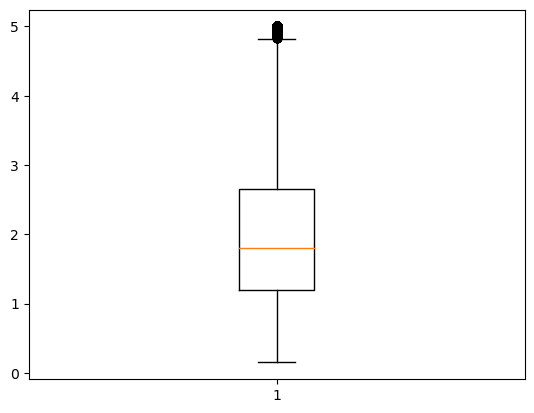

In [25]:
plt.boxplot(df5['median_house_value'])

In [29]:
q1, q3 = df5['median_house_value'].quantile([0.25, 0.75])
q1, q3

(1.195, 2.647)

In [30]:
x = df5.drop(['median_house_value'], axis='columns')

y = df5.median_house_value
y.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: median_house_value, dtype: float64

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [32]:
rfr_model = RandomForestRegressor()
rfr_model.fit(x_train, y_train)

RandomForestRegressor()

In [33]:
rfr_model.score(x_test, y_test)

0.7223272427022525

In [34]:
x.head()

,housing_median_age,median_income,bedrooms_per_total_rooms,households_per_population,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,41,8.3252,0.146591,0.391304,0,0,0,1,0
1,21,8.3014,0.155797,0.473969,0,0,0,1,0
2,52,7.2574,0.129516,0.356855,0,0,0,1,0
3,52,5.6431,0.184458,0.392473,0,0,0,1,0
4,52,3.8462,0.172096,0.458407,0,0,0,1,0


In [35]:
#this function will be called any time we want to predict the price of an apartment with some specs
def predict_price(median_age, total_rooms, bedrooms, population, households, median_income, location):
    loc_index = np.where(x.columns==location)[0][0]
    
    var = np.zeros(len(x.columns))
    var[0] = median_age
    var[1] = median_income
    var[2] = bedrooms/total_rooms
    var[3] = households/population
    
    if loc_index >=0:
        var[loc_index] = 1
#     print(x)
    return rfr_model.predict([var])[0]

In [36]:
predict_price(17,1822, 438, 578, 291, 5.4346, '<1H OCEAN')

C:\Users\Nunoo Justice Samuel\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names



3.712681499999998

In [37]:
y.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: median_house_value, dtype: float64

In [159]:
import pickle
with open('califonia_house_pricing.pickle', 'wb') as f:
    pickle.dump(rfr_model, f)

In [167]:
import json
columns = {
    'data_columns' : [col.lower() for col in x.columns]
}
with open('cali_columns.json', 'w') as f:
    f.write(json.dumps(columns))

In [168]:
col = ''
with open('cali_columns.json', 'r') as f:
    col = json.load(f)['data_columns']

In [169]:
for i in col[4:]:
    print(i)

<1h ocean
inland
island
near bay
near ocean


In [38]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [39]:
lr_model = LinearRegression()

lr_model.fit(x_train, y_train)

LinearRegression()

In [40]:
lr_model.score(x_test, y_test)

0.6723533075772932

In [41]:
lr_model.intercept_

-0.9542939297289696

In [42]:
y_predicted = lr_model.predict(x_test)

In [43]:
rfr_model = RandomForestRegressor()
rfr_model.fit(x_train, y_train)

RandomForestRegressor()

In [44]:
rfr_model.score(x_test, y_test)

0.7321892990611376

In [45]:
rfr_predicted = rfr_model.predict(x_test)

In [28]:
dtr_model = DecisionTreeRegressor()
dtr_model.fit(x_train, y_train)

DecisionTreeRegressor()

In [29]:
dtr_model.score(x_test, y_test)

0.4433593651894283

In [30]:
dtr_predicted = dtr_model.predict(x_test)

In [31]:
from sklearn.metrics import confusion_matrix

In [32]:
n = len(y_test)
mse = 1/n * sum((y_test - y_predicted)**2)

In [33]:
mse

0.5143757422275345

In [34]:
def mse(test, predicted):
    n = len(y_test)
    error = 1/n * sum((y_test - y_predicted)**2)
    return error

In [35]:
mse(y_test,y_predicted)

0.5143757422275345

In [36]:
mse(y_test, rfr_predicted)

0.5143757422275345

In [37]:
mse(y_test, dtr_predicted)

0.5143757422275345

In [47]:

# Define a custom R-squared metric function
def r_squared(y_true, y_pred):
    # Calculate the total sum of squares (TSS)
    tss = tf.reduce_sum(tf.square(y_true - tf.reduce_mean(y_true)))
    
    # Calculate the residual sum of squares (RSS)
    rss = tf.reduce_sum(tf.square(y_true - y_pred))
    
    # Calculate R-squared as 1 - (RSS / TSS)
    rsquared = 1 - (rss / tss)
    
    return rsquared

In [50]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(x_train.shape[1],), activation = 'relu'),
    keras.layers.Dense(75, activation = 'relu'),
    keras.layers.Dense(50, activation = 'relu'),
    keras.layers.Dense(25, activation = 'relu'),
    keras.layers.Dense(1)
])

model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = [r_squared])

In [51]:
model.fit(x_train, y_train, epochs = 100)

Epoch 1/100
511/511 [==============================] - 7s 5ms/step - loss: 0.6233 - r_squared: 0.5008
Epoch 2/100
511/511 [==============================] - 3s 5ms/step - loss: 0.5418 - r_squared: 0.5700
Epoch 3/100
511/511 [==============================] - 3s 5ms/step - loss: 0.5155 - r_squared: 0.5919
Epoch 4/100
511/511 [==============================] - 3s 5ms/step - loss: 0.4911 - r_squared: 0.6087
Epoch 5/100
511/511 [==============================] - 3s 5ms/step - loss: 0.4762 - r_squared: 0.6205
Epoch 6/100
511/511 [==============================] - 3s 5ms/step - loss: 0.4668 - r_squared: 0.6289
Epoch 7/100
511/511 [==============================] - 3s 5ms/step - loss: 0.4531 - r_squared: 0.6353
Epoch 8/100
511/511 [==============================] - 3s 5ms/step - loss: 0.4489 - r_squared: 0.6411
Epoch 9/100
511/511 [==============================] - 3s 5ms/step - loss: 0.4486 - r_squared: 0.6433
Epoch 10/100
511/511 [==============================] - 3s 5ms/step - loss: 0.4417

511/511 [==============================] - 3s 5ms/step - loss: 0.3568 - r_squared: 0.7104
Epoch 81/100
511/511 [==============================] - 3s 6ms/step - loss: 0.3610 - r_squared: 0.7118
Epoch 82/100
511/511 [==============================] - 3s 7ms/step - loss: 0.3558 - r_squared: 0.7122
Epoch 83/100
511/511 [==============================] - 3s 6ms/step - loss: 0.3586 - r_squared: 0.7097
Epoch 84/100
511/511 [==============================] - 3s 5ms/step - loss: 0.3538 - r_squared: 0.7129
Epoch 85/100
511/511 [==============================] - 3s 5ms/step - loss: 0.3599 - r_squared: 0.7095
Epoch 86/100
511/511 [==============================] - 3s 6ms/step - loss: 0.3559 - r_squared: 0.7139
Epoch 87/100
511/511 [==============================] - 3s 5ms/step - loss: 0.3587 - r_squared: 0.7120
Epoch 88/100
511/511 [==============================] - 3s 5ms/step - loss: 0.3546 - r_squared: 0.7127
Epoch 89/100
511/511 [==============================] - 3s 6ms/step - loss: 0.3527 - r

In [52]:
model.evaluate(x_test, y_test)

128/128 [==============================] - 1s 4ms/step - loss: 0.3831 - r_squared: 0.6935


[0.3830896019935608, 0.6934701204299927]

In [38]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, ShuffleSplit
import pandas as pd

def find_best_model(x, y):
    algos = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {
                'fit_intercept': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1, 2],
                'selection': ['random', 'cyclic']
            }
        },
        'random_forest':{
            'model': RandomForestRegressor(),
            'params' : {
                'criterion' : ["squared_error", "absolute_error", "friedman_mse", "poisson"],
            'max_features' : ["sqrt", "log2", None]
            }  
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['mse', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        }
    }

    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

    for algoname, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(x, y)
        scores.append({
            'model': algoname,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])


In [ ]:
find_best_model(x,y)

In [81]:
from sklearn.metrics import r2_score

In [88]:
r2_score(y_predicted, y1_test)

0.5963441355697415

In [65]:
# %matplotlib inline
# longitude = df['longitude']
# latitude = df['latitude']
# plt.scatter(latitude, longitude, c=df['medain_house_value'], cmap='coolwarm')
# # Set labels and title
# plt.xlabel("Latitude")
# plt.ylabel("Longitude")
# plt.title("Scatter Plot of Latitude vs. Longitude")

# # Add a colorbar
# plt.colorbar(label="Median House Value")
# plt.show()

KeyError: 'medain_house_value'

In [ ]:
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(15, 8))

# Scatter plot
plt.scatter(df["latitude"], df["longitude"], c=df["median_house_value"], cmap="coolwarm")

# Set labels and title
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.title("Scatter Plot of Latitude vs. Longitude")

# Add a colorbar
plt.colorbar(label="Median House Value")

# Show the plot
plt.show()


KeyError: 'hover_text'

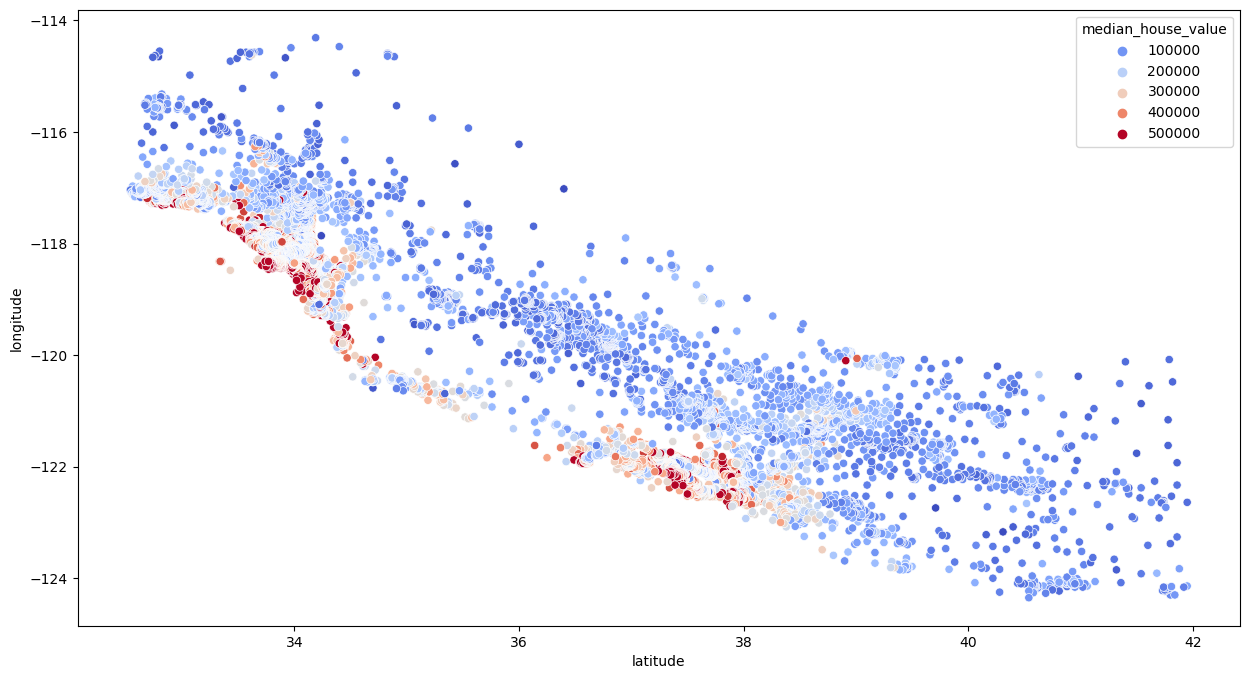

In [68]:
import seaborn as sns
plt.figure(figsize=(15,8))
scatter_plot = sns.scatterplot(x="latitude", y="longitude", data= df, hue="median_house_value", palette="coolwarm")

# Set hovertemplate
hover_text = df["hover_text"]
scatter_plot.set(
    **{
        "hovertemplate": "Latitude: %{x}<br>Longitude: %{y}<br>Median House Value: %{color:.2f}<br>%{text}",
        "text": hover_text
    }
)

plt.show()

In [70]:
pip install xgboost

     ---------------------------------------- 70.9/70.9 MB 2.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [71]:
from xgboost import XGBRegressor

xgb = XGBRegressor()

In [73]:
xgb.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [76]:
xgb.score(x_test, y_test)

0.7073997886865087